In [1]:
# Load libraries
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn.metrics import roc_auc_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pandas import DataFrame

In [2]:
#Load dataset
def prepare_data():
    #generate 2d dataset
    X, Y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=2, weights=[0.99], flip_y=0, random_state=4)
    #summarize class distribution
    counter = Counter(Y)
    print(counter)

    # data visualization
    # scatter plot of examples by class label
    for label, _ in counter.items():
        row_ix = where(Y == label)[0]
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend
    pyplot.show()

    #split into train and test
    n_train = 5000
    trainX, testX = X[:n_train,:],X[n_train:, :]
    trainY, testY = Y[:n_train], Y[n_train:]
    return trainX, trainY, testX, testY

In [3]:
# define the neural network model
def build_model(n_input):
    #define model
    model = Sequential()
    #define first hidden layer and visible layer
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    #define output layer
    model.add(Dense(1, activation='sigmoid'))
    #define loss and optimizer
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

Counter({0: 9900, 1: 100})


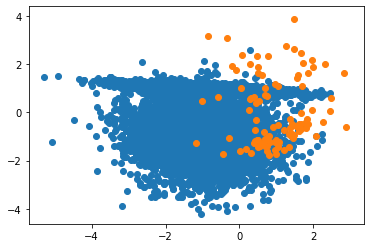

In [11]:
# Prepare dataset
trainX, trainY, testX, testY = prepare_data()

In [12]:
#define the model
n_input = trainX.shape[1]
model = build_model(n_input)

#fit model
model.fit(trainX, trainY, epochs=100, verbose=0)

#make predictions on the test dataset
yhat = model.predict(testX)

#evaluate the ROC AUC of the predictions
score = roc_auc_score(testY, yhat)

print('ROC AUC: %.3f' % score)

ROC AUC: 0.940
